<a href="https://colab.research.google.com/github/alvinhugo/studi-kasus-03-kelompok-01/blob/main/Tangerang_Studi_Kasus_3_Kelompok_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TANGERANG

In [ ]:
# Loading Data:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
import missingno
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [ ]:
dfT = dfT.dropna(axis=1,how='all')
dfT = dfT.dropna(axis=0,how='all')
dfT = dfT.dropna()
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,Selatan,148.0,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Selatan,760.0,https://www.rumah123.com/properti/tangerang/ho...,Lokasi rumah sangat strategis dekat fasilitas ...
10,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"PONDOK JAGUNG, TANGERANG",SHM,2200.0,Tenggara,600.0,https://www.rumah123.com/properti/tangerang/ho...,Memiliki lokasi yang strategis yaitu 100 meter...
13,12-06-2021,72.0,40.0,2.0,1.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Timur,500.0,https://www.rumah123.com/properti/tangerang/ho...,Keamanan 24 jam dan sangat strategis
16,12-06-2021,250.0,360.0,5.0,4.0,1.0,1.0,"BENDA, TANGERANG",SHM,4400.0,Timur,2900.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki lantai granit, 1 gudang, Water heater..."
40,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,2200.0,Selatan,600.0,https://www.rumah123.com/properti/tangerang/ho...,BOSTON VILLAGE BSD- BINTARO\r\nAkses 100 Meter...
45,12-06-2021,320.0,225.0,3.0,3.0,1.0,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Barat Daya,5300.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah cluster, siap huni, bersih terawat, ling..."
54,12-06-2021,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,Utara,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
55,12-06-2021,250.0,380.0,6.0,4.0,1.0,1.0,"BSD, TANGERANG",SHM,5500.0,Barat,5050.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah di kawasan BSD, Luas tanah : 250 m2, Lua..."
84,12-06-2021,144.0,117.0,3.0,3.0,1.0,1.0,"BANJAR WIJAYA, TANGERANG",SHM,2200.0,Utara,1950.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas keamanan, Masjid, Jogging T..."


In [ ]:
dfT.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
# Mengecek apakah ada data yang sama (duplikasi) di Data Rumah Jual Tangerang
dfT.duplicated().sum()

0

##Statistika Deskriptif


In [ ]:
dfT.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,15.0,207.933333,119.188007,60.0,108.0,202.0,288.0,474.0
LB,15.0,219.933333,171.872239,40.0,66.5,148.0,370.0,500.0
KT,15.0,3.733333,1.334523,2.0,3.0,4.0,4.5,6.0
KM,15.0,3.000000,1.195229,1.0,2.0,3.0,4.0,5.0
listrik,15.0,4593.333333,5662.213937,1300.0,2200.0,2200.0,4400.0,23000.0
harga,15.0,3088.533333,3374.019770,148.0,680.0,1900.0,4175.0,12500.0


In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 7 to 121
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  15 non-null     object  
 1   LT          15 non-null     float64 
 2   LB          15 non-null     float64 
 3   KT          15 non-null     float64 
 4   KM          15 non-null     float64 
 5   garasi      15 non-null     category
 6   carport     15 non-null     category
 7   lokasi      15 non-null     category
 8   sertifikat  15 non-null     category
 9   listrik     15 non-null     float64 
 10  hadap       15 non-null     category
 11  harga       15 non-null     float64 
 12  URL         15 non-null     object  
 13  deskripsi   15 non-null     object  
dtypes: category(5), float64(6), object(3)
memory usage: 3.5+ KB


##visualisasi data

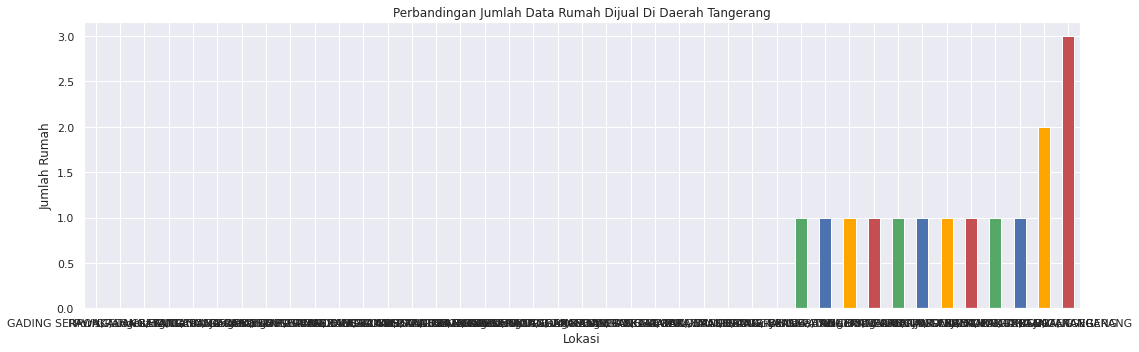

BSD, TANGERANG                      3
CIKUPA CITRA JAYA, TANGERANG        2
BSD Griya Loka, Tangerang           1
BENDA, TANGERANG                    1
SEPATAN, TANGERANG                  1
BSD CITY, TANGERANG                 1
BSD DE PARK, TANGERANG              1
BSD FORESTA, TANGERANG              1
PONDOK JAGUNG, TANGERANG            1
PONDOK CABE, TANGERANG              1
BANJAR WIJAYA, TANGERANG            1
BSD THE ICON, TANGERANG             1
MAUK, TANGERANG                     0
KARAWACI, TANGERANG                 0
LEGOK, TANGERANG                    0
LIPPO KARAWACI, TANGERANG           0
ALAM SUTERA, TANGERANG              0
PAGEDANGAN, TANGERANG               0
PASAR KEMIS, TANGERANG              0
PINANG, TANGERANG                   0
GADING SERPONG, TANGERANG           0
Pagedangan, Tangerang               0
Poris, Tangerang                    0
RAWAKALONG, TANGERANG               0
GRAHA RAYA, TANGERANG               0
CILEDUG, TANGERANG                  0
Ciater, Tang

In [ ]:
# Menampilkan grafik Perbandingan Jumlah Data Rumah Dijual Di Tangerang
plt.figure(figsize=(16,5))
tmp_df1 = dfT.lokasi.value_counts()
tmp_df1.sort_values().plot(kind="bar", color=['r','g','b','orange'])
plt.title(f"Perbandingan Jumlah Data Rumah Dijual Di Daerah Tangerang")
plt.xlabel("Lokasi")
plt.ylabel(f"Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
display(tmp_df1)

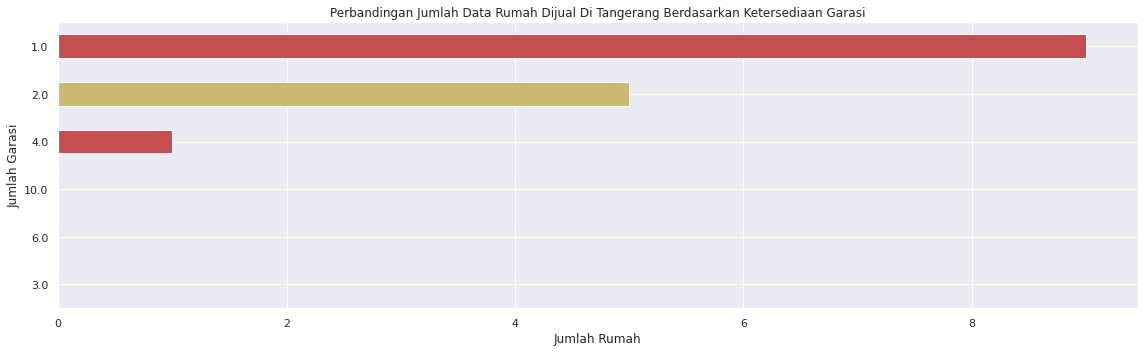

1.0     9
2.0     5
4.0     1
3.0     0
6.0     0
10.0    0
Name: garasi, dtype: int64

In [ ]:
# Menampilkan grafik Perbandingan Jumlah Data Rumah Dijual Di Tangerang Berdasarkan Ketersediaan Garasi
plt.figure(figsize=(16,5))
tmp_df2 = dfT.garasi.value_counts()
tmp_df2.sort_values().plot(kind="barh", color=['y','r'])
plt.title(f"Perbandingan Jumlah Data Rumah Dijual Di Tangerang Berdasarkan Ketersediaan Garasi")
plt.xlabel("Jumlah Rumah")
plt.ylabel(f"Jumlah Garasi")
plt.tight_layout()
plt.show()
display(tmp_df2)

#INTERPRETASI
Di lihat dari data diatas bahwa jumlah rumah yang mempunyai garasi 1 lebih banyak di banding dengan jumlah rumah yang memiliki garasi lebih dari 1, berarti jumlah garasi tidak mempengaruhi minat pembeli
Saran dari kami, lebih baik memanfaatkan lahan yang ada untuk membuat garasi yang semaksimal mungkin atau bisa membuat carport supaya lebih efisien.

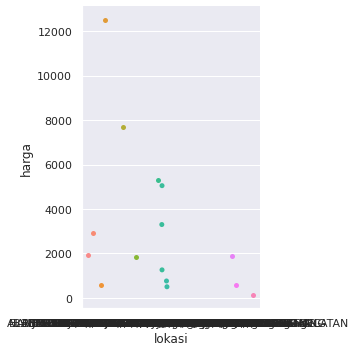

In [ ]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="harga", data=dfT)


#interpretasi
berdasarkan visualisasi diatas harga rumah di BSD harganya terlampau tinggi di bandingkan di tempat yang lain, berati tempat yang strategis dan dekat dengan area publik sangat berpengaruh terhadap harga rumah yang tinggi. saran kami untuk daerah yang jauh dari area publik perlu di perhatikan lagi dari segi kecocokan harga


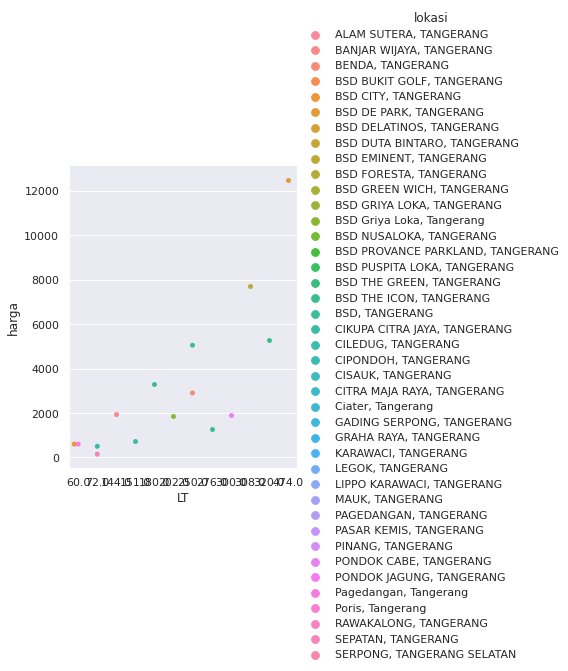

In [ ]:
# Distribusi Harga Rumah Berdasarkan Ketersediaan LT dan Lokasi Rumah
q = sns.catplot(x="LT", y="harga", hue="lokasi", kind="swarm", data=dfT)

#interpretasi
berdasarkan visualisai diatas luas tanah tidak mempengaruhi terhadap harga yang tinggi, berarti tempat yang strategis menjadi faktor utama terhadap harga rumah yang tinggi. saran dari kami untuk lokasi didaerah banjar perlu di perhatikan dan disurvey kembali padahal luas tanah di banjar termasuk yang paling luas diantara yang lain.